In [355]:
# Aditya Agre DL HONORS IE1
# TYCOA6
# 121B1B
# Option1 chosen

In [356]:
from sklearn.datasets import make_classification 
import seaborn as sns
import numpy as np

In [357]:
# Here 
k1,k2 = make_classification(n_samples=1000, n_features=4, n_classes=2,n_clusters_per_class=1)

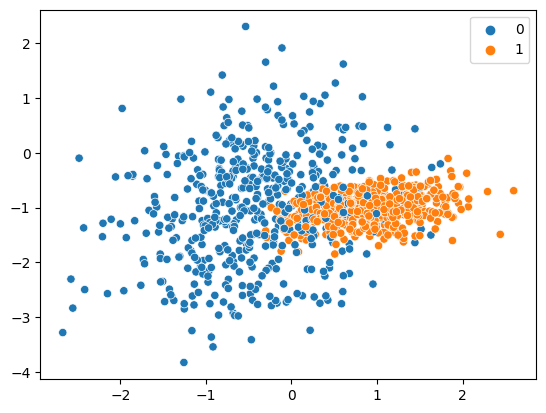

In [358]:
sns.scatterplot(x=k1[:,0],y=k1[:,1],hue=k2);

In [359]:
from sklearn.model_selection import train_test_split

In [360]:
trainx,testx,trainy,testy = train_test_split(k1,k2,test_size = 0.5, random_state = 42)
#0.1 test, 0.9 train

In [361]:
for i in [trainx,testx,trainy,testy]:
    print(len(i))

500
500
500
500


In [362]:
import torch.nn as nn
import torch.nn.functional as F


In [363]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=4, out_features=6)
        self.layer_2 = nn.Linear(in_features=6, out_features=4)
        self.layer_3 = nn.Linear(in_features=4, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [364]:
##model1 = model().to(device)
#model1

In [365]:
device = 'cpu'

In [366]:
model1 = model().to(device)
model1

model(
  (layer_1): Linear(in_features=4, out_features=6, bias=True)
  (layer_2): Linear(in_features=6, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=1, bias=True)
)

In [367]:
# state dict has all the parameters of a layer stored as a tensor
state_dict = model1.state_dict()
print(state_dict)

OrderedDict([('layer_1.weight', tensor([[ 0.3823,  0.4150, -0.1171,  0.4593],
        [-0.1096,  0.1009, -0.2434,  0.2936],
        [ 0.4408, -0.3668,  0.4346,  0.0936],
        [ 0.3694,  0.0677,  0.2411, -0.0706],
        [ 0.3854,  0.0739, -0.2334,  0.1274],
        [-0.2304, -0.0586, -0.2031,  0.3317]])), ('layer_1.bias', tensor([-0.3947, -0.2305, -0.1412, -0.3006,  0.0472, -0.4938])), ('layer_2.weight', tensor([[ 0.3687, -0.3468,  0.3152,  0.0679, -0.1326,  0.2523],
        [ 0.0636,  0.3298,  0.0446, -0.1288,  0.1097, -0.1107],
        [ 0.1718,  0.3645,  0.2360, -0.1785,  0.2357,  0.0730],
        [ 0.2073, -0.2488, -0.4041, -0.1577, -0.3131,  0.3350]])), ('layer_2.bias', tensor([ 0.1176,  0.1691,  0.1291, -0.0071])), ('layer_3.weight', tensor([[ 0.3913, -0.3553,  0.0315, -0.3413]])), ('layer_3.bias', tensor([0.1542]))])


In [368]:
import torch.optim as optim

In [369]:
# Initialize the optimizer

optimizer = optim.SGD(params=model1.parameters(), 
                            lr=0.1)

In [370]:
# now im initializing loss function

loss_fn = nn.BCEWithLogitsLoss()

In [371]:
import torch
trainx = torch.from_numpy(trainx).type(torch.float)
trainy = torch.from_numpy(trainy).type(torch.float)
testx = torch.from_numpy(testx).type(torch.float)
testy =torch.from_numpy(testy).type(torch.float)

In [372]:

## this function is taking given value and predicetd value to calculate accuracy

def accuracy(y_given, y_generated):
    correct = torch.eq(y_given, y_generated).sum().item() 
    ans = (correct / len(y_generated)) * 100 
    return ans

In [373]:

# First 10 values

y_logits = model1(testx.to(device))[:5]
y_logits

tensor([[-0.0910],
        [ 0.1011],
        [ 0.4077],
        [-0.0648],
        [ 0.4674]], grad_fn=<SliceBackward0>)

In [374]:
## Now I want the values that are predicted by my model

generated_y = torch.sigmoid(y_logits)
generated_y


tensor([[0.4773],
        [0.5252],
        [0.6005],
        [0.4838],
        [0.6148]], grad_fn=<SigmoidBackward0>)

In [375]:
generated_y = torch.round(generated_y)


y_pred_labels = torch.round(torch.sigmoid(model1(testx.to(device))[:5]))


print(torch.eq(generated_y.squeeze(), y_pred_labels.squeeze()))


generated_y.squeeze()

tensor([True, True, True, True, True])


tensor([0., 1., 1., 0., 1.], grad_fn=<SqueezeBackward0>)

In [376]:
# Checking accuracy of my model before training

accuracy_ = accuracy(y_logits,generated_y)
accuracy_

0.0

In [377]:
# Training model

import torch
epochs = 5

torch.manual_seed(42)

for epoch_i in range(epochs):
    model1.train()
    
    y_logits = model1(trainx).squeeze()
    
    # Applying activation function sigmoid
    generated_y = torch.round(torch.sigmoid(y_logits))
    
    
    current_loss = loss_fn(y_logits, trainy)
        
    acc = accuracy(trainy, generated_y) 
    
    optimizer.zero_grad()
    
    # Updating
    current_loss.backward()
    
    optimizer.step()
    
    # testing
    
    model1.eval()
    
    
    with torch.inference_mode():
        
        
        test_logits = model1(testx).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
      
        test_loss = loss_fn(test_logits,testy)
        test_acc = accuracy(testy,generated_y)
        
        state_dict = model1.state_dict()
        print(state_dict)

    

OrderedDict([('layer_1.weight', tensor([[ 0.3837,  0.4155, -0.1162,  0.4571],
        [-0.1136,  0.0996, -0.2461,  0.2998],
        [ 0.4474, -0.3647,  0.4390,  0.0836],
        [ 0.3726,  0.0687,  0.2432, -0.0754],
        [ 0.3861,  0.0741, -0.2330,  0.1265],
        [-0.2297, -0.0584, -0.2026,  0.3307]])), ('layer_1.bias', tensor([-0.3951, -0.2294, -0.1430, -0.3015,  0.0470, -0.4940])), ('layer_2.weight', tensor([[ 0.3672, -0.3531,  0.3204,  0.0755, -0.1320,  0.2446],
        [ 0.0649,  0.3356,  0.0399, -0.1356,  0.1092, -0.1038],
        [ 0.1717,  0.3640,  0.2364, -0.1779,  0.2357,  0.0724],
        [ 0.2086, -0.2433, -0.4087, -0.1643, -0.3136,  0.3416]])), ('layer_2.bias', tensor([ 0.1147,  0.1717,  0.1289, -0.0046])), ('layer_3.weight', tensor([[ 0.3951, -0.3616,  0.0226, -0.3533]])), ('layer_3.bias', tensor([0.1468]))])
OrderedDict([('layer_1.weight', tensor([[ 0.3851,  0.4159, -0.1153,  0.4551],
        [-0.1179,  0.0982, -0.2489,  0.3062],
        [ 0.4540, -0.3625,  0.4433, 

In [378]:
## Q1: my network has 63 parameters

In [379]:
## Q2: 

In [380]:
## Q3   Accuracy can be increased by increasing number of epochs